#### test notebook for skeleton plot

In [34]:
%load_ext autoreload
%autoreload 2
import skeleton_plot as skelplot
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#various google cloud paths 

#raw skeleton files
skel_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'
skel_dir = '864691134884807418_518848'
skel_filename = '864691134884807418_518848.swc'

# upright
upright_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/upright/BIL_excitatory/'

# layer aligned
layer_aligned_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/layer_align/BIL_excitatory/'


# polygon files (layer bounds for each cell)
# gives 2d shape for each layer 
layer_bounds_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/poly_files/BIL_polys/'

# average layer bounds from IVSCC (to which layer aligned celled are alligned)
# this just gives a single value for each layer (straight line)
layer_bounds_average_path = "gs://allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/"
avg_layerdepths_filename = 'mouse_me_and_met_avg_layer_depths.json'


# mesh path with gs://
mw_path = 'gs://allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'


rid = 864691134884807418
sid = 518848



In [3]:
# successful run 
depths = skelplot.plot_tools.read_depths(layer_bounds_average_path, avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [4]:
# now https version 
depths = skelplot.plot_tools.read_depths('https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/',
                                         avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [148]:
# should raise error
depths = skelplot.plot_tools.read_depths('layer_bounds_average_path', 'avg_layerdepths_filename')
depths

UnsupportedProtocolError: [1;93m
Cloud Path must conform to [FORMAT://]PROTOCOL://PATH
Examples: 
  precomputed://gs://test_bucket/em
  gs://test_bucket/em
  graphene://https://example.com/image/em

Supported Formats: None (precomputed), graphene, precomputed, boss
Supported Protocols: gs, file, s3, matrix, http, https, mem

Cloud Path Recieved: layer_bounds_average_path
[m

In [9]:
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')


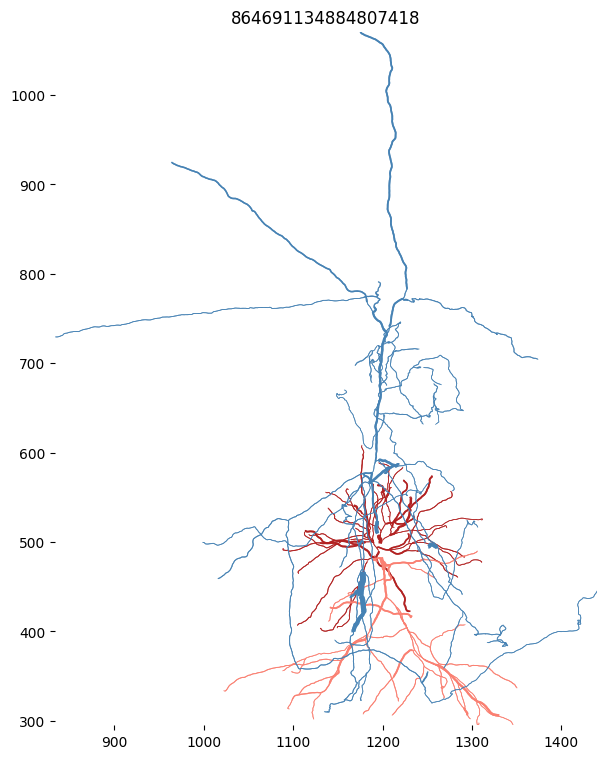

In [146]:
# plot the radii from the swc 
f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True)

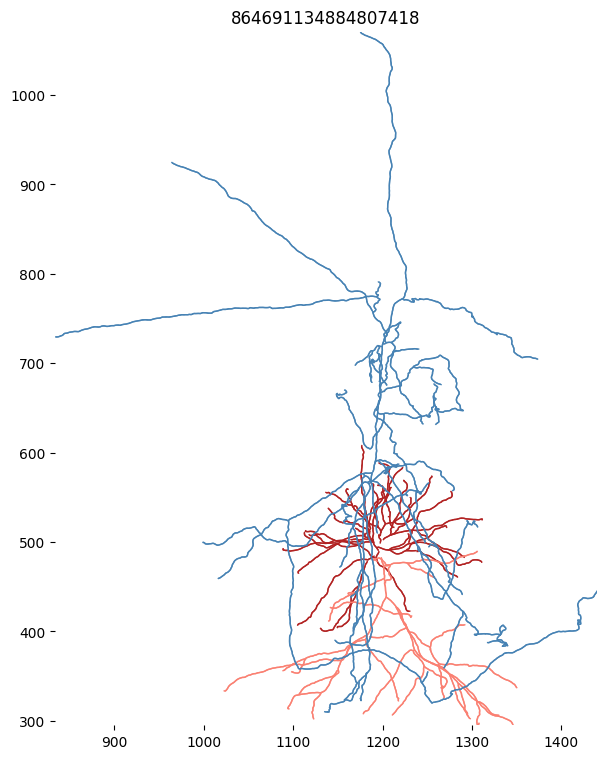

In [151]:
# plot with constant radius 
f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_cell(ax, sk, title=rid, line_width=1)